In [1]:
using ITensors
import TensorCrossInterpolation as TCI
using TCIITensorConversion
using QuanticsGrids
using Plots
include("../../src/functions.jl")

packages uploaded
------------------------------


functions uploaded
------------------------------


**Using the TCI to find the TN form**

In [2]:


L1 = 40 #for n
L2 = 20 #for p
L3 = 10 #for k 

L = Int(L1+ L2+ L3)
β = 100
k_max = 2π # momentum of the polarization
p_max = 2π
k_min = 0
T = 1/β
m = 0 #The 


epsilon(p:: Real) = cos(p) - μ
μ = 1/3


G(iω, p) = 1/(iω - epsilon(p))

function f(v)
    x = b2c(v[1:L1])
    x1 = b2c(v[L1+1:L1+L2])
    x2 = b2c(v[L1+L2+1:L1+L2+L3])
    n = 2^(L1 + 1) * (x - 1/2) 
    iω = (2*n + 1) * π * T *im
    p = p_max * (x1-1/2)
    k = k_max * (x2)  + k_min
    return G(iω, p+k)
end

localdims = fill(2, L)  # Fill the tensor with dimensions of size 2

tolerance = 1e-18

tci, ranks, errors = TCI.crossinterpolate2(ComplexF64, f, localdims; tolerance=tolerance, maxbonddim = 800)

mps_shifted = MPS(tci)
println()
#=
println("mps_shifted calculation is done")

h5open("mps_shifted_1D_data.h5", "w") do file
    write(file, "MPS", mps_shifted)
end
println("file saved successfully")
=#   

 




In [3]:

L = Int(L1+ L2)


function f(v)
    x = b2c(v[1:L1])
    x1 = b2c(v[L1+1:L1+L2])
    n = 2^(L1 + 1) * (x - 1/2) 
    iω = (2*n + 1) * π * T *im
    p = p_max * (x1-1/2)
    return G(iω, p)
end

localdims = fill(2, L)  # Fill the tensor with dimensions of size 2

tolerance = 1e-18

tci, ranks, errors = TCI.crossinterpolate2(ComplexF64, f, localdims; tolerance=tolerance, maxbonddim = 500)

mps = MPS(tci)
println()
#=
println("mps_shifted calculation is done")

h5open("mps_1D_data.h5", "w") do file
    write(file, "MPS", mps)
end
println("file saved successfully")
=#


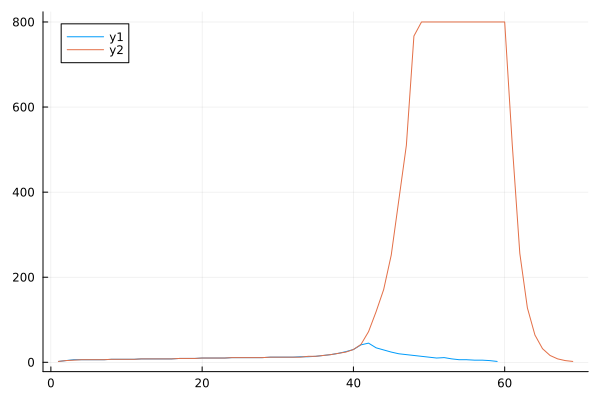

In [4]:
plot([i for i in linkdims(mps)])
plot!([i for i in linkdims(mps_shifted)])

In [5]:
function zipup_MPS_MPS_from_left(Mps1::MPS, Mps2::MPS)
    M1 = copy(Mps1)
    M2 = copy(Mps2)
    n1 = length(M1)
    n2 = length(M2)
    @assert n1 <= n2
    #changing the M1 index
    for j in range(1,n1)
        M1[j] = M1[j]* delta(siteinds(M1)[j],siteinds(M2)[j])
    end
    M = MPS(n2-n1)
    Clinked = M1[1]*M2[1]
    for i in range(2,n1)
        Clinked *= M1[i]
        Clinked *= M2[i]
    end
    M[1] = Clinked * M2[n1+1] 
    for i in range(n1+2,n2)
        M[i-n1] = M2[i]
    end
    return M
end

zipup_MPS_MPS_from_left (generic function with 1 method)

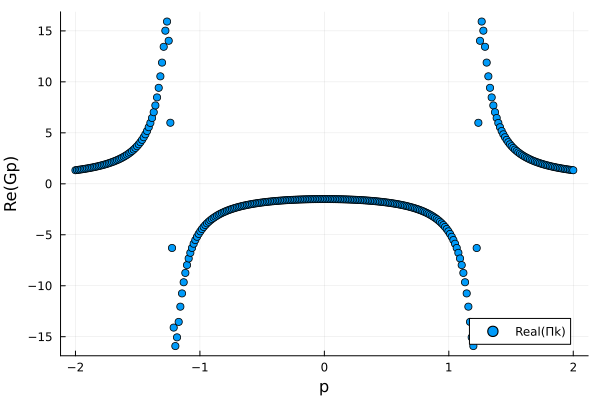

In [11]:
p_range = LinRange(-2,2,300)

Gp = []
for p in p_range
    x = c2b(1/2 ,L1)
    x1 = c2b(p/p_max +1/2, L2)
    s = [x; x1]
    push!(Gp , evaluate(mps,s))
end
# Assuming k_range and Πk are defined
scatter(p_range, real.(Gp), xlabel="p",ylabel="Re(Gp)", label="Real(Πk)")

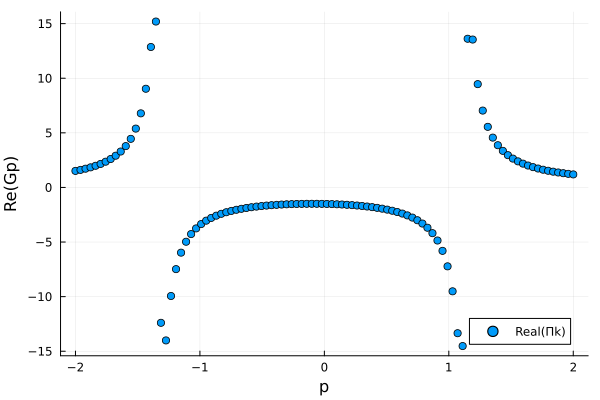

In [10]:
p_range = LinRange(-2,2,100)
k = 0.1
Gpk = []
for p in p_range
    x = c2b(1/2 ,L1)
    x1 = c2b(p/p_max +1/2, L2)
    x2 = c2b(k/k_max, L3)
    s = [x; x1; x2]
    push!(Gpk , evaluate(mps_shifted,s))
end
# Assuming k_range and Πk are defined
scatter(p_range, real.(Gpk), xlabel="p",ylabel="Re(Gp)", label="Real(Πk)")

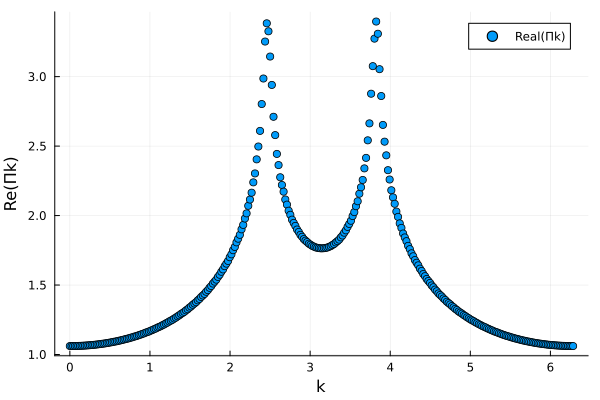

In [9]:
I = zipup_MPS_MPS_from_left(mps, mps_shifted)

k_range = LinRange(0,k_max,300)
Πk = []
for k in k_range
    x3 = c2b(k/k_max - k_min,L3)
    push!(Πk , -p_max* T* (1/2^(L2))*evaluate(I,x3))
end
# Assuming k_range and Πk are defined
scatter(k_range, real.(Πk), xlabel="k",ylabel="Re(Πk)", label="Real(Πk)")

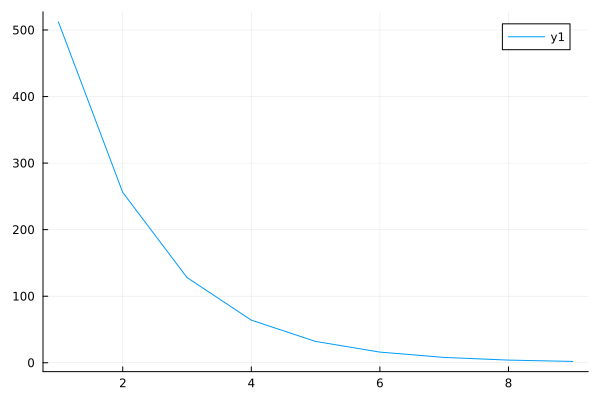

In [12]:
plot([i for i in linkdims(I)])

In [13]:
I2 = copy(I)
truncate!(I2, maxdim = 100)

MPS
[1] ((dim=2|id=821|"n=61"), (dim=2|id=326|"l=61,link"))
[2] ((dim=2|id=726|"n=62"), (dim=4|id=550|"l=62,link"), (dim=2|id=326|"l=61,link"))
[3] ((dim=2|id=607|"n=63"), (dim=8|id=354|"l=63,link"), (dim=4|id=550|"l=62,link"))
[4] ((dim=2|id=484|"n=64"), (dim=16|id=724|"l=64,link"), (dim=8|id=354|"l=63,link"))
[5] ((dim=2|id=664|"n=65"), (dim=32|id=989|"l=65,link"), (dim=16|id=724|"l=64,link"))
[6] ((dim=2|id=198|"n=66"), (dim=16|id=931|"l=66,link"), (dim=32|id=989|"l=65,link"))
[7] ((dim=2|id=393|"n=67"), (dim=8|id=792|"l=67,link"), (dim=16|id=931|"l=66,link"))
[8] ((dim=2|id=31|"n=68"), (dim=4|id=679|"l=68,link"), (dim=8|id=792|"l=67,link"))
[9] ((dim=2|id=154|"n=69"), (dim=2|id=246|"l=69,link"), (dim=4|id=679|"l=68,link"))
[10] ((dim=2|id=640|"n=70"), (dim=2|id=246|"l=69,link"))


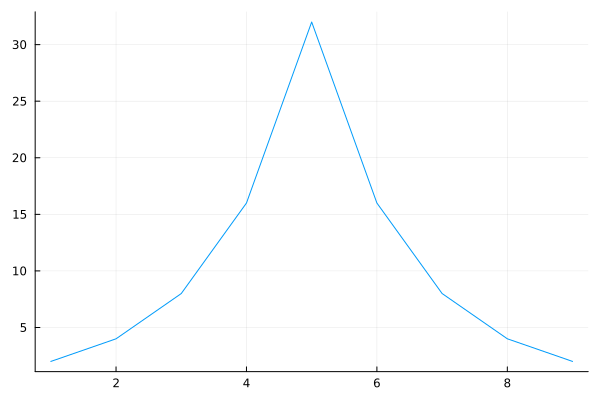

In [14]:
χ = [i for i in linkdims(I2)];
plot(χ,legend=false)

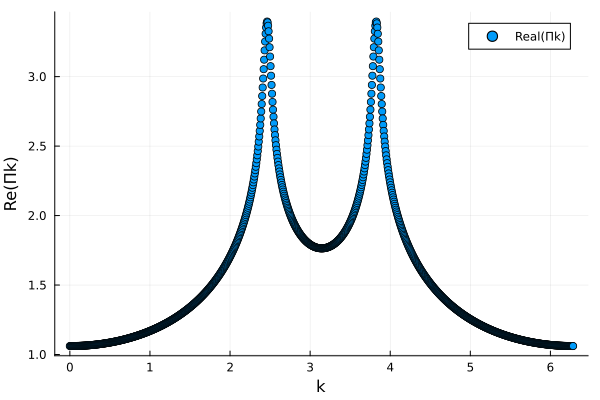

In [21]:
k_range = LinRange(0,k_max,2^10)
Πk = []
for k in k_range
    x3 = c2b(k/k_max - k_min,L3)
    push!(Πk , -p_max* T* (1/2^(L2))*evaluate(I2,x3))
end
# Assuming k_range and Πk are defined
scatter(k_range, real.(Πk), xlabel="k",ylabel="Re(Πk)", label="Real(Πk)")